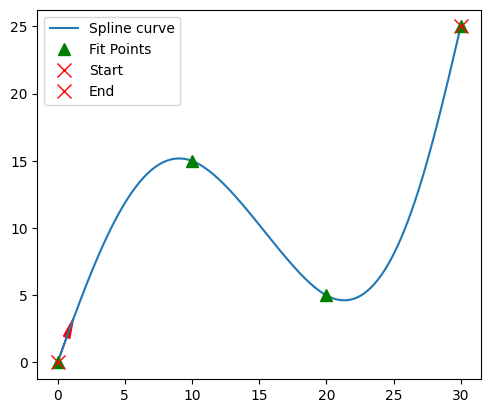

In [7]:
import ezdxf
import matplotlib.pyplot as plt

def extract_spline_features(dxf_file, num_points=100):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    splines_data = []

    for spline in msp.query("SPLINE"):
        bspline = spline.construction_tool()

        # 离散点
        points = [(p.x, p.y) for p in bspline.approximate(num_points)]

        # 特征点
        control_points = [(p[0], p[1]) for p in spline.control_points]
        fit_points = [(p[0], p[1]) for p in spline.fit_points]
        knots = list(spline.knots)

        splines_data.append({
            "points": points,
            "control_points": control_points,
            "fit_points": fit_points,
            "knots": knots
        })

    return splines_data


def visualize_splines(splines_data):
    fig, ax = plt.subplots()
    for spline in splines_data:
        xs, ys = zip(*spline["points"])
        ax.plot(xs, ys, '-', label="Spline curve")

        # 控制点：蓝色方块
        if spline["control_points"]:
            cx, cy = zip(*spline["control_points"])
            ax.plot(cx, cy, 'bs', markersize=8, label="Control Points")

        # 拟合点：绿色三角形
        if spline["fit_points"]:
            fx, fy = zip(*spline["fit_points"])
            ax.plot(fx, fy, 'g^', markersize=8, label="Fit Points")

        # 起点/终点：红色圆点
        start_x, start_y = spline["points"][0]
        end_x, end_y = spline["points"][-1]
        ax.plot(start_x, start_y, 'rx', markersize=10, label="Start")
        ax.plot(end_x, end_y, 'rx', markersize=10, label="End")

        # 方向箭头（起点到第二个点）
        next_x, next_y = spline["points"][1]
        dx, dy = next_x - start_x, next_y - start_y
        ax.arrow(start_x, start_y, dx*5, dy*5,
                 head_width=0.5, head_length=1.5, fc='red', ec='red')

    ax.set_aspect('equal')
    ax.legend()
    plt.show()


# 示例调用
splines = extract_spline_features("spline.dxf", num_points=200)
visualize_splines(splines)